# Load NOAA COOPS data using the NOAA API

We set up a function to access the API with the station ID, start and end dates, product, and units.

We'll look at [8739803](https://tidesandcurrents.noaa.gov/stationhome.html?id=8739803), Bayou La Batre Bridge, AL for the date range 2016-08-01 to 2017-02-01.

Full details on the API are available at https://tidesandcurrents.noaa.gov/api/

In [1]:
import requests
import numpy as np
import datetime as dt
import pytz
from dateutil import parser

def get_coops_data(station, start_date, end_date, product='hourly_height', units='metric'):
    """
    units can be 'english' or 'metric'

    product options include 'water_level', 'hourly_height', 'predictions'
    from https://tidesandcurrents.noaa.gov/api/
    Option	Description
    water_level	Preliminary or verified water levels, depending on availability.
    air_temperature	Air temperature as measured at the station.
    water_temperature	Water temperature as measured at the station.
    wind	Wind speed, direction, and gusts as measured at the station.
    air_pressure	Barometric pressure as measured at the station.
    air_gap	Air Gap (distance between a bridge and the water's surface) at the station.
    conductivity	The water's conductivity as measured at the station.
    visibility	Visibility from the station's visibility sensor. A measure of atmospheric clarity.
    humidity	Relative humidity as measured at the station.
    salinity	Salinity and specific gravity data for the station.
    hourly_height	Verified hourly height water level data for the station.
    high_low	Verified high/low water level data for the station.
    daily_mean	Verified daily mean water level data for the station.
    monthly_mean	Verified monthly mean water level data for the station.
    one_minute_water_level	One minute water level data for the station.
    predictions	6 minute predictions water level data for the station.
    datums	datums data for the stations.
    currents	Currents data for currents stations.
    """

    url = 'http://tidesandcurrents.noaa.gov/api/datagetter?product=' \
    + product \
    + '&application=NOS.COOPS.TAC.WL&begin_date=' \
    + str(start_date) \
    + '&end_date=' \
    + str(end_date) \
    + '&datum=MLLW&station=' \
    + str(station) \
    + '&time_zone=GMT&units=' \
    + units \
    + '&format=json'

    payload = requests.get(url).json()

    if 'error' in payload.keys():
        raise ValueError('Error in returning dataset. Time requested too long?')

    t = []
    v = []
    if product == 'water_level' or product == 'hourly_height':
        d = payload['data']
    elif product == 'predictions':
        d = payload['predictions']
        
    for n in range(len(d)):
        t.append(pytz.utc.localize(parser.parse(d[n]['t'])))
        try:
            v.append(float(d[n]['v']))
        except:
            v.append(np.nan)
    t = np.array(t)
    v = np.array(v)

    n = {}
    n['dn'] = t
    n['v'] = v

    return n

In [2]:
product = 'hourly_height'
n = get_coops_data(station=8739803, start_date=20160801, end_date=20170201, product=product)

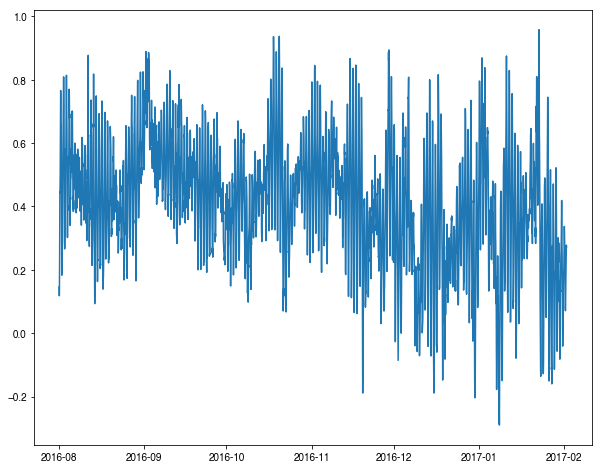

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
plt.plot(n['dn'], n['v'])
plt.show()